In [14]:
import pandas as pd
import re

# Load the CSV file into a DataFrame
df = pd.read_csv('./synthetic_writtings.csv')
df2 = pd.read_csv('./synthetic_writtings2.csv')

In [15]:
df = pd.concat([df, df2], ignore_index=True)

In [16]:
df

,Converse,Writing,Type,About,Sentiment,Rima
0,User: Voldria un poema satíric sobre la por.\n...,poems,sàtira,NaN,por,tetrasíl·labs (4 versos)
1,User: Em podries fer un haiku sobre tendresa?\...,poems,haiku,NaN,tendresa,alexandrins (12 versos)
2,User: Necessito un correu electrònic formal pe...,emails,formal email,legal and compliance notes,NaN,NaN
3,User: Podries escriure una epopeia sobre la id...,poems,epopeia,NaN,identitat,octosíl·labs (8 versos)
4,"User: Hola, necessito un correu electrònic for...",emails,formal email,legal and compliance notes,NaN,NaN
...,...,...,...,...,...,...
5118,User: Pots crear un missatge per al grup de vo...,whatsapp messages,community groups,volunteer opportunities,NaN,NaN
5119,User: Pots crear un missatge per al grup de Wh...,whatsapp messages,community groups,volunteer opportunities,NaN,NaN
5120,User: Necessito un correu electrònic per envia...,emails,educational email,course updates,NaN,NaN
5121,User: Necessito un post per LinkedIn sobre lid...,linkedin posts,industry insights,thought leadership,NaN,NaN


In [17]:
def parse_converse(text):
    # Define regex patterns to extract prompt and completion
    pattern = re.compile(r'User: (.+?)\nAI: (.+)', re.DOTALL)
    match = pattern.search(text)
    
    if match:
        prompt = match.group(1).strip()
        completion = match.group(2).strip()
        return pd.Series([prompt, completion])
    else:
        return pd.Series([None, None])

# Apply the function to the 'converse' column
df[['prompt', 'completion']] = df['Converse'].apply(parse_converse)

# Optionally, drop the original 'converse' column if it's no longer needed
df.drop(columns=['Converse'], inplace=True)


In [18]:
df_cleaned = df[['prompt', 'completion']]

In [19]:
df_cleaned.head()

,prompt,completion
0,Voldria un poema satíric sobre la por.,"La por, un monstre que ens fa tremolar,\nEns a..."
1,Em podries fer un haiku sobre tendresa?,"Un toc suau de seda,\nUn somriure que s'escamp..."
2,Necessito un correu electrònic formal per envi...,Assumpte: Notes Legals i de Conformitat - [El ...
3,Podries escriure una epopeia sobre la identitat?,"Qui som, d'on venim, què ens fa ser,\nUn miste..."
4,"Hola, necessito un correu electrònic formal pe...",Hola! Aquí tens un correu electrònic que pots ...


In [34]:
df_cleaned = df_cleaned.dropna()

In [35]:
df_cleaned.to_csv('cleaned_writings.csv', index=False)

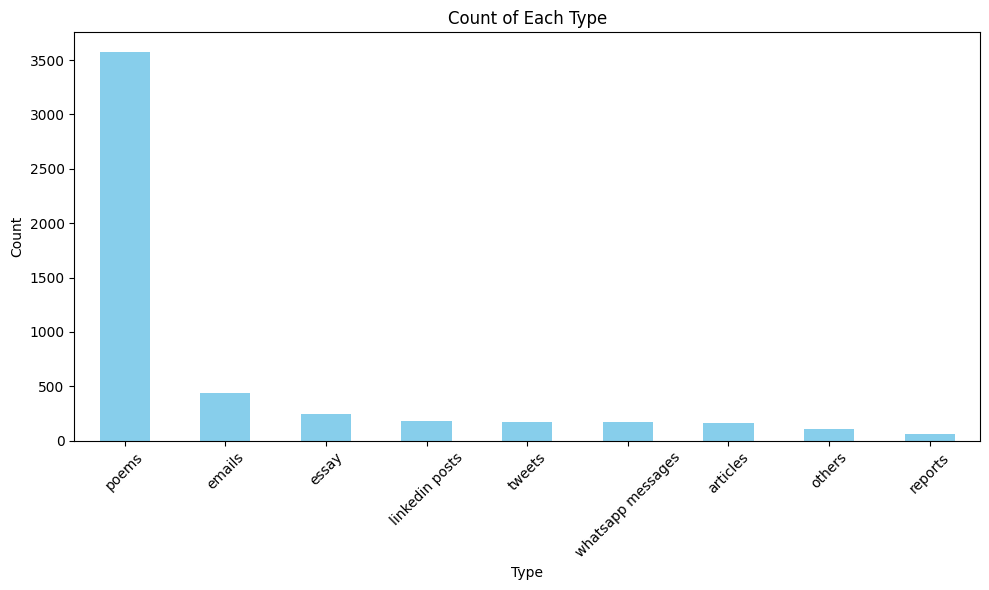

In [36]:
import matplotlib.pyplot as plt

type_counts = df['Writing'].value_counts()

# Create a barplot
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Each Type')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

In [37]:
from huggingface_hub import HfApi, HfFolder, Repository, DatasetCard, DatasetCardData
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd

In [38]:
hf_dataset = load_dataset("csv", data_files="cleaned_writings.csv")


Generating train split: 0 examples [00:00, ? examples/s]

In [39]:
from huggingface_hub import create_repo
repo_url = create_repo("pauhidalgoo/patufet-escrits", repo_type="dataset", private=False)


hf_dataset.push_to_hub("pauhidalgoo/patufet-escrits")

print("Dataset uploaded successfully to Hugging Face!")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/315 [00:00<?, ?B/s]

Dataset uploaded successfully to Hugging Face!
